### 무게를 찾기
- 목표 : 농어(Perch) 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋 : fish.csv
- 피쳐/속성 : Length
- 타켓/라벨 : Weight
- 학습방법 : 지도학습> 회귀
- 알고리즘 : 선형회귀 >> 데이터의 분포가 선형형태

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
fishDF=pd.read_csv('../data/fish.csv')

In [19]:
fishDF=fishDF[fishDF['Species']=='Perch']

In [20]:
feature=pd.DataFrame(fishDF['Length'])
target=fishDF['Weight']

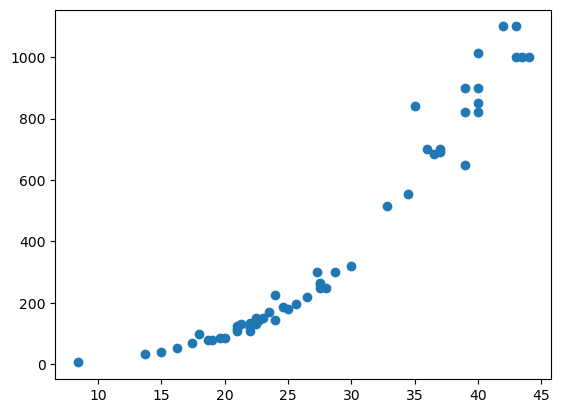

In [21]:
# 시각화
plt.scatter(feature,target)
plt.show()

In [22]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=3)

In [24]:
# 스케일링
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [26]:
scaler.fit(X_train)

StandardScaler()

In [27]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [28]:
# 선형회귀 모델 
from sklearn.linear_model import LinearRegression

In [29]:
model=LinearRegression()

In [30]:
# 학습
model.fit(X_train_scaled,y_train)

LinearRegression()

In [31]:
from sklearn.metrics import mean_squared_error


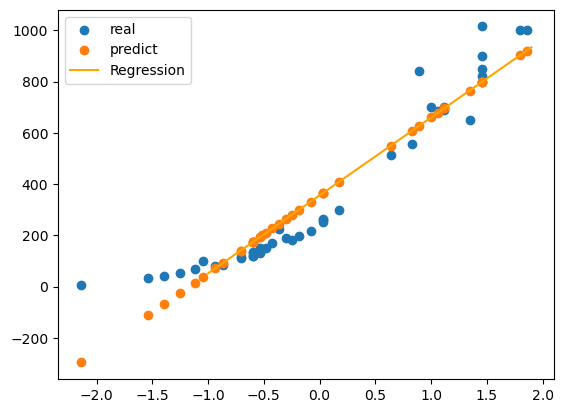

In [32]:
# 트레인셋 시각화
plt.scatter(X_train_scaled,y_train,label='real')
plt.scatter(X_train_scaled,model.predict(X_train_scaled),label='predict')
x=np.arange(-1,2,0.1)
plt.plot(x,model.coef_*x+model.intercept_,color='orange',label='Regression')
plt.legend()
plt.show()

In [33]:
model.coef_

array([304.17595958])

In [34]:
# 트레인모델 검사
model.score(X_train_scaled,y_train)

0.9088404897375967

In [35]:
mean_squared_error(model.predict(X_train_scaled),y_train)

9280.344322841922

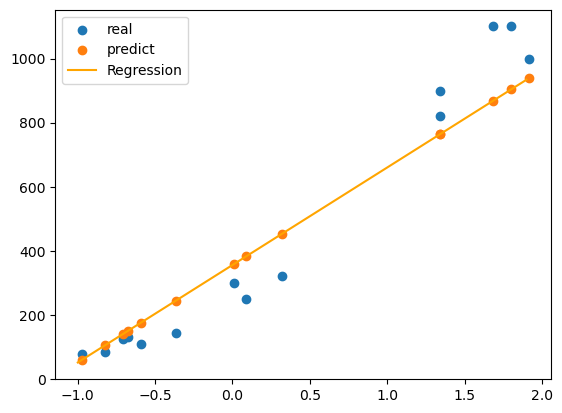

In [36]:
# 테스트셋 시각화
import numpy as np
plt.scatter(X_test_scaled,y_test,label='real')
plt.scatter(X_test_scaled,model.predict(X_test_scaled),label='predict')
x=np.arange(-1,2,0.1)
plt.plot(x,model.coef_*x+model.intercept_,color='orange',label='Regression')
plt.legend()
plt.show()

In [37]:
# 테스트 모델 검사
model.score(X_test_scaled,y_test)

0.9238079610488564

In [38]:
mean_squared_error(model.predict(X_test_scaled),y_test)

12259.632213041974

In [39]:
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import Pipeline

In [58]:
degrees=list(range(1,8))


for i in range(len(degrees)):
    # poly

    poly=PolynomialFeatures(degree=degrees[i])
    poly_feature=poly.fit_transform(feature)

    # 셋분리
    X_train,X_test,y_train,y_test=train_test_split(poly_feature,target,random_state=3)

    model=LinearRegression()
    model.fit(X_train,y_train)
    

    print(f' {degrees[i]} degree train score : {model.score(X_train,y_train)*100:.2f}')
    print(f' {degrees[i]} degree test socre : {model.score(X_test,y_test)*100:.2f}')
    print('\n')


 1 degree train score : 90.88
 1 degree test socre : 92.38


 2 degree train score : 96.84
 2 degree test socre : 97.85


 3 degree train score : 96.97
 3 degree test socre : 97.73


 4 degree train score : 97.30
 4 degree test socre : 97.86


 5 degree train score : 97.30
 5 degree test socre : 97.85


 6 degree train score : 97.39
 6 degree test socre : 97.55


 7 degree train score : 97.39
 7 degree test socre : 97.59




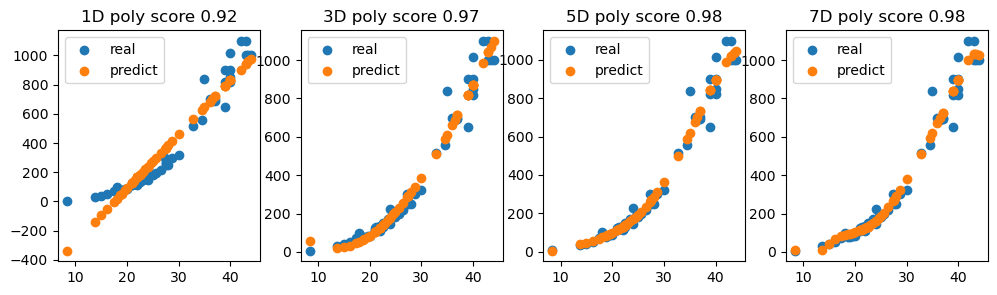

In [59]:
degrees=list(range(1,8,2))
plt.figure(figsize=(3*len(degrees),3))

for i in range(len(degrees)):
    # poly

    poly=PolynomialFeatures(degree=degrees[i])
    poly_feature=poly.fit_transform(feature)


    model=LinearRegression()
    model.fit(poly_feature,target)

    ax=plt.subplot(1,len(degrees),i+1)
    ax.scatter(feature,target,label='real')
    ax.scatter(feature,model.predict(poly_feature),label='predict')
    ax.set_title(f'{degrees[i]}D poly score {model.score(poly_feature,target):.2f}')
    ax.legend()

plt.show()

